리뷰데이터 가져오기 / 전처리

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 기본 패키지 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 글꼴 경로 지정
font_path = '/content/drive/MyDrive/예진/malgun.ttf'

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

# 데이터 불러오기

path = '/content/drive/MyDrive/Data/Airbnb_London/reviews.csv'


df_review = pd.read_csv(path, encoding='utf-8')

df_review = df_review[['listing_id','date','comments']]

df_review = df_review.rename(columns= {
    'listing_id' : '숙소_id',
    'date': '리뷰날짜',
    'comments' : '리뷰'
})

#date >> 데이터타입 변경 datatime

df_review['리뷰날짜'] = pd.to_datetime(df_review['리뷰날짜'])

df_review.dropna(subset=['리뷰','리뷰날짜'], inplace=True)

#br/ 을 포함하고 있는 리뷰 >> br/을 공백(띄어쓰기)로 변경
df_review['리뷰'] = df_review['리뷰'].str.replace('<br/>', ' ', regex=False)

df_review['숙소_id'] = df_review['숙소_id'].astype(int)


# #다른 나라 언어 삭제
# path = '../../../../data/Airbnb_London_review/Not_englush_reviews.csv'

# df_lang = pd.read_csv(path, encoding='utf-8')

# df_lang.rename(columns={'not_english_reivew':'다른언어리뷰'}, inplace=True)
# matching_rows = df_review[df_review['리뷰'].isin(df_lang['다른언어리뷰'])]
# df_review = df_review.drop(matching_rows.index)


<ipython-input-3-8902ce905a3f>:31: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_review = pd.read_csv(path, encoding='utf-8')


In [4]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1033671 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   숙소_id   1033671 non-null  int64         
 1   리뷰날짜    1033671 non-null  datetime64[ns]
 2   리뷰      1033671 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 31.5+ MB


In [5]:
df_review.head()

,숙소_id,리뷰날짜,리뷰
0,13913,2010-08-18,My girlfriend and I hadn't known Alina before ...
1,13913,2011-07-11,Alina was a really good host. The flat is clea...
2,13913,2011-09-13,Alina is an amazing host. She made me feel rig...
3,13913,2011-10-03,"Alina's place is so nice, the room is big and ..."
4,13913,2011-10-09,"Nice location in Islington area, good for shor..."


언어감지 모듈(langdetect)를 이용하여 영어가 아닌 리뷰 찾기 (1시간30분걸림..)

In [ ]:
# !pip install langdetect

In [ ]:
# from langdetect import detect

# # 예시 리뷰 데이터
# comments = df['comments']

# # 영어가 아닌 리뷰를 담을 리스트
# non_english_reviews = []

# # 언어를 감지하고, 영어가 아닌 리뷰를 추출
# for comment in comments:
#     try:
#         lang = detect(comment)
#         if lang != 'en':  # 영어가 아닌 리뷰인 경우
#             non_english_reviews.append(comment)
#     except:
#         pass

# # 영어가 아닌 리뷰 출력
# print("Non-English Reviews:")
# for review in non_english_reviews:
#     print("-", review.count())


숙소 데이터 가져오기 / 전처리

In [7]:
# 기본 패키지 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 글꼴 경로 지정
font_path = '/content/drive/MyDrive/예진/malgun.ttf'  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

# 데이터 불러오기

path = '/content/drive/MyDrive/Data/Airbnb_London/listings.csv'

london_lists = pd.read_csv(path)

# 1차 선별한 컬럼 25개 중 22개 2차 선별 + 1개(숙소_예약가능_여부)
# 최근 리뷰가 작성되었는지를 보기 위해 2개 컬럼 추가_240529 >> 'number_of_reviews_ltm' // 'last_review'
# URL 컬럼 london_lists에 적용_240530

columns_selected = ['id', 'listing_url', 'host_id', 'host_is_superhost', 'neighbourhood_cleansed', 'property_type', \
    'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'has_availability', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'last_review', 'review_scores_rating', 'review_scores_accuracy', \
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']

# 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'minimum_nights', 'maximum_nights', 'has_availability',

# 선별한 컬럼만 적용
london_lists = london_lists[columns_selected]

# 변수 정리
london_lists = london_lists.rename(columns={
    'id': '숙소_id',
    'listing_url' : '숙소_url',
    'host_id': '호스트_id',
    # 'host_response_time': '답변_평균시간',
    # 'host_response_rate': '문의_응답률',
    # 'host_acceptance_rate': '예약_수락률',
    'host_is_superhost': '슈퍼호스트',
    # 'host_total_listings_count': '숙소_수',
    # 'host_has_profile_pic' : '프로필_사진',
    # 'host_identity_verified' : '호스트_신원',
    'neighbourhood_cleansed': '숙소_지역',
    'property_type' : '숙소_특징',
    'room_type': '숙소_유형',
    'accommodates': '수용_인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    # 'minimum_nights': '최소_숙박일',
    # 'maximum_nights': '최대_숙박일',
    'has_availability' : '예약가능여부',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_ltm' : '12개월리뷰수',
    'number_of_reviews_l30d': '30일리뷰수',
    'last_review' : '마지막리뷰',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수'

})

temp = london_lists.copy()
raw = london_lists.copy()

# 컬럼명 확인
london_lists.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90852 entries, 0 to 90851
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        90852 non-null  int64  
 1   숙소_url       90852 non-null  object 
 2   호스트_id       90852 non-null  int64  
 3   슈퍼호스트        90463 non-null  object 
 4   숙소_지역        90852 non-null  object 
 5   숙소_특징        90852 non-null  object 
 6   숙소_유형        90852 non-null  object 
 7   수용_인원수       90852 non-null  int64  
 8   욕실수          57894 non-null  float64
 9   침실수          78118 non-null  float64
 10  침대수          57837 non-null  float64
 11  편의시설         90852 non-null  object 
 12  숙소_가격        57885 non-null  object 
 13  예약가능여부       86773 non-null  object 
 14  리뷰수          90852 non-null  int64  
 15  12개월리뷰수      90852 non-null  int64  
 16  30일리뷰수       90852 non-null  int64  
 17  마지막리뷰        65869 non-null  object 
 18  리뷰점수         65869 non-null  float64
 19  숙소_정

In [8]:
# 리뷰수가 0인 컬럼 조건
condition_review_0 = london_lists['리뷰수'] == 0

# 별도의 DF로 저장
london_lists_review_0 = london_lists[condition_review_0]

# 리뷰 개수가 0이 아닌 컬럼 조건 설정
condition_review = london_lists['리뷰수'] != 0

# 리뷰 개수가 0이 아닌 컬럼으로 df 업데이트
london_lists = london_lists[condition_review]
temp = london_lists.copy()

#숙소 유형 제거
# 조건 설정
condition_room_entirehomeapt = london_lists['숙소_유형'] == 'Entire home/apt'
condition_room_privateroom = london_lists['숙소_유형'] == 'Private room'

# 데이터 제거
london_lists = london_lists[(condition_room_entirehomeapt | condition_room_privateroom)]

# 예약가능여부 결측치 제거
london_lists = london_lists[london_lists["예약가능여부"].notnull()]


# 가격이 null값/notnull값 조건 생성
condition_price_notnull = london_lists['숙소_가격'].notnull()
condition_price_null = london_lists['숙소_가격'].isnull()

# 가격이 null값/null값이 아닌 df 분리
london_lists_price = london_lists[condition_price_notnull]
london_lists_price_null = london_lists[condition_price_null]

# 변수명 정리 널값이 아닌 데이터
london_lists = london_lists_price

#슈퍼호스트 결측치 제거
london_lists = london_lists.dropna(subset=['슈퍼호스트'])

#욕실,침대,침실수 결측츠제거
london_lists = london_lists.dropna(subset=['욕실수', '침실수', '침대수'])

#리뷰점수 결측치제거
london_lists = london_lists.dropna(subset=['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수'])

#12개월 리뷰수 0인것 제거
london_lists = london_lists[london_lists['12개월리뷰수'] != 0]

london_lists['숙소_가격'] = london_lists['숙소_가격'].str.lstrip('$').str.replace(',', '').astype('float')

#가격이 0 인값 제거
london_lists = london_lists[london_lists['숙소_가격'] != 0.0]

# 슈퍼호스트를 f로 바꿈
london_lists.loc[(london_lists['슈퍼호스트'] == 't') & (london_lists['리뷰점수'] < 4.8), '슈퍼호스트'] = 'f'

#게스트 선호 컬럼 추가
# 새로운 '게스트선호' 컬럼을 추가하고 기본값으로 'f' 설정
london_lists['게스트선호'] = 'f'
# 조건에 맞는 행의 '게스트선호' 값을 't'로 변경
london_lists.loc[(london_lists['리뷰점수'] >= 4.9) & (london_lists['리뷰수'] >= 5) & (london_lists['슈퍼호스트'] == 't'), '게스트선호'] = 't'

#이상치 처리

#수용 인원수 이상치 제거

import pandas as pd


# 이상치를 제거하는 함수 정의
def remove_price_outliers(df, price_column, type):

    condition = (df['숙소_유형'] == type)

    if price_column != '숙소_가격':
        Q1 = df[price_column].quantile(0.25)
        Q3 = df[price_column].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR


        outlier = df[price_column][condition] > upper_bound
        upper_outlier = df[condition][outlier]

        upper_outlier_indices = upper_outlier.index
        london_lists_cleaned = df.drop(index=upper_outlier_indices, inplace=True)
        df = london_lists_cleaned
        return df
    else:
        Q1 = df[price_column].quantile(0.25)
        Q3 = df[price_column].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 3 * IQR


        outlier = df[price_column][condition] > upper_bound
        upper_outlier = df[condition][outlier]

        upper_outlier_indices = upper_outlier.index
        london_lists_cleaned = df.drop(index=upper_outlier_indices, inplace=True)
        df = london_lists_cleaned
        return df
# 숙소 가격의 이상치 제거
remove_price_outliers(london_lists, '수용_인원수', 'Entire home/apt')
remove_price_outliers(london_lists, '수용_인원수', 'Private room')
remove_price_outliers(london_lists, '숙소_가격', 'Entire home/apt')
remove_price_outliers(london_lists, '숙소_가격', 'Private room')



<ipython-input-8-512aa42de6e6>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  london_lists['게스트선호'] = 'f'
<ipython-input-8-512aa42de6e6>:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  london_lists_cleaned = df.drop(index=upper_outlier_indices, inplace=True)
<ipython-input-8-512aa42de6e6>:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  london_lists_cleaned = df.drop(index=

전처리된 숙소 데이터 의 숙소 id 값이 있는 리뷰데이터만 가져오기

In [9]:
london_lists_ids = london_lists['숙소_id'].values.tolist()
london_lists_ids

[312761,
 13913,
 15400,
 159736,
 165336,
 17402,
 314164,
 34935,
 36299,
 173082,
 174132,
 174635,
 315238,
 316137,
 36660,
 316864,
 38610,
 38995,
 181664,
 318287,
 182802,
 41445,
 183128,
 320629,
 41712,
 321411,
 198279,
 43129,
 322606,
 200713,
 323473,
 201463,
 203163,
 47192,
 207542,
 47687,
 55402,
 216350,
 326633,
 56229,
 326655,
 63948,
 219665,
 329585,
 66772,
 331058,
 334310,
 231452,
 231692,
 73125,
 73431,
 338198,
 78892,
 232240,
 338354,
 232983,
 79129,
 236956,
 80123,
 341779,
 81410,
 81449,
 241621,
 241975,
 342003,
 81635,
 83027,
 342804,
 344094,
 244126,
 84223,
 344102,
 84532,
 84640,
 346523,
 85191,
 86092,
 248291,
 254996,
 263822,
 348215,
 264777,
 264778,
 264779,
 264780,
 264781,
 91287,
 92352,
 92399,
 93015,
 264782,
 264783,
 349930,
 266037,
 93783,
 270600,
 273941,
 351727,
 96052,
 97506,
 274740,
 274918,
 353133,
 275140,
 98541,
 356073,
 102565,
 276888,
 103865,
 358360,
 280234,
 107051,
 359974,
 116268,
 117203,
 362

In [10]:
# df_filtered에서 listing_ids에 없는 숙소_id 제거
df_review = df_review[df_review['숙소_id'].isin(london_lists_ids)]
df_review

,숙소_id,리뷰날짜,리뷰
0,13913,2010-08-18,My girlfriend and I hadn't known Alina before ...
1,13913,2011-07-11,Alina was a really good host. The flat is clea...
2,13913,2011-09-13,Alina is an amazing host. She made me feel rig...
3,13913,2011-10-03,"Alina's place is so nice, the room is big and ..."
4,13913,2011-10-09,"Nice location in Islington area, good for shor..."
...,...,...,...
1048568,39029216,2019-10-13,"Anna is an exceptional host, she met us at Pad..."
1048569,39070453,2023-11-04,"Room was clean, but smelt of feet. One pillow ..."
1048570,39070453,2023-11-19,"Ubytovani za tyhle pen?ze adekvatni, jak p??st..."
1048571,39070453,2023-12-30,It was a nice experience


In [11]:
df_review.shape

(671966, 3)

영어 리뷰와 영어가 아닌 리뷰 분리

In [12]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=742d71a268e78bdef9f031719776d8e252f3d32ea8a2b8b519146b59aed9c4b0
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
reviews = df_review['리뷰']

In [13]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

# Seed를 설정하여 결과의 재현성을 확보
DetectorFactory.seed = 0

# 리뷰 데이터를 영어와 영어가 아닌 데이터로 분리하는 함수
def is_english(text):
    try:
        return detect(text) == 'en'
    except LangDetectException:
        return False

# 영어로 적힌 리뷰와 영어가 아닌 리뷰로 분리
df_review['is_english'] = df_review['리뷰'].apply(is_english)
english_reviews = df_review[df_review['is_english'] == True]
non_english_reviews = df_review[df_review['is_english'] == False]

# 결과 확인
print(f"영어 리뷰 개수: {english_reviews.shape[0]}")
print(f"영어가 아닌 리뷰 개수: {non_english_reviews.shape[0]}")

영어 리뷰 개수: 576006
영어가 아닌 리뷰 개수: 95960


In [20]:
english_reviews.to_csv('/content/drive/MyDrive/Data/Airbnb_London/english_reviews.csv',encoding='utf-8', index=False)


In [21]:
non_english_reviews.to_csv('/content/drive/MyDrive/Data/Airbnb_London/non_english_reviews.csv',encoding='utf-8', index=False)

In [14]:
!pip install google-cloud-translate==2.0.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.4/120.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.9/152.9 kB 15.0 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.3.3
    Uninstalling cachetools-5.3.3:
      Successfully uninstalled cachetools-5.3.3
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.27.0
    Uninstalling google-auth-2.27.0:
      Successfully uninstalled google-auth-2.27.0
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 2.11.1
    Uninstalling google-api-core-2.11.1:
      Successfully uninstalled google-api-core-2.11.1
  Attempting uninstall: google-cloud-core
    Found existing installation: google-cloud-core 2.3.3
    Uninstalling google-cloud-core-2.3.3:
      Successfully uninstalled google-cloud-core-2.3.3
  Attempting uninstall: g

In [15]:
import os


os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/content/drive/MyDrive/예진/translateapi-425511-d3b74de492db.json"

In [16]:
from google.cloud import translate_v2 as translate

translate_client = translate.Client()

def translate_to_english(text):
    # 타겟 언어는 'en'으로 설정합니다.
    result = translate_client.translate(text, target_language='en')
    return result['translatedText']

In [22]:
non_english_reviews['translated_review'] = non_english_reviews['리뷰'].apply(translate_to_english)

<ipython-input-22-81c6ced846a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_english_reviews['translated_review'] = non_english_reviews['리뷰'].apply(translate_to_english)


In [24]:
# 번역된 리뷰를 '리뷰' 컬럼에 저장
non_english_reviews['리뷰'] = non_english_reviews['translated_review']

# 필요 없는 컬럼 제거
non_english_reviews.drop(['is_english', 'translated_review'], axis=1, inplace=True)
english_reviews.drop(['is_english'], axis=1, inplace=True)

# 데이터 합치기
combined_reviews = pd.concat([english_reviews, non_english_reviews], ignore_index=True)

<ipython-input-24-87399cb84a47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_english_reviews['리뷰'] = non_english_reviews['translated_review']
<ipython-input-24-87399cb84a47>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_english_reviews.drop(['is_english', 'translated_review'], axis=1, inplace=True)
<ipython-input-24-87399cb84a47>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [25]:
combined_reviews.to_csv('/content/drive/MyDrive/Data/Airbnb_London/combined_reviews.csv',encoding='utf-8', index=False)


In [26]:
combined_reviews

,숙소_id,리뷰날짜,리뷰
0,13913,2010-08-18,My girlfriend and I hadn't known Alina before ...
1,13913,2011-07-11,Alina was a really good host. The flat is clea...
2,13913,2011-09-13,Alina is an amazing host. She made me feel rig...
3,13913,2011-10-03,"Alina's place is so nice, the room is big and ..."
4,13913,2011-10-09,"Nice location in Islington area, good for shor..."
...,...,...,...
671961,38876344,2023-04-06,"It is a very good place to stay, the rooms are..."
671962,39070453,2023-05-19,30 minutes pe? iz letali??a terminal 5
671963,39070453,2023-05-31,"Great accommodation, very practical for a stop..."
671964,39070453,2023-10-06,The location of the Airbnb was good for gettin...


랜덤 20000만개 데이터 추출

In [27]:
import pandas as pd

# 리뷰 데이터가 담긴 DataFrame (예: df)
# 예시로 df를 생성합니다. 실제 데이터 프레임을 사용하세요.
# df = pd.read_csv('path_to_your_file.csv')

# 10,000개의 랜덤 샘플 추출
random_sample = combined_reviews.sample(n=20000, random_state=42)

# 결과를 확인합니다.
print(random_sample)

           숙소_id       리뷰날짜                                                 리뷰
484604  29585223 2022-05-30  We wanted somewhere handy  for the Tottenham s...
266232  14378646 2022-11-20  great value for money. right in the heart of L...
555       165336 2022-08-25  Had a wonderful stay at Nathan’s. Loved the ec...
288138  15340823 2022-04-24  Very convenient location for folks who are loo...
560312  37483245 2019-12-12       Great location, great space and good price!!
...          ...        ...                                                ...
73289    1739911 2015-06-02  This is the perfect place to stay for Brick La...
622112  15996748 2018-02-23  Housing ? the image of what is proposed: clean...
542342  35531221 2023-12-27  I cannot say enough nice things about this pla...
20097     390750 2017-06-16  Great location and easy access to transportati...
420181  23638870 2022-06-04  Lovely flat with amazing views of the city. Gr...

[20000 rows x 3 columns]


In [ ]:
# 추출한 데이터를 CSV 파일로 저장
random_sample.to_csv('../../../../data/Airbnb_London/random_review_20000.csv', index=False)

<h3>숙소데이터 패턴 분석 </h3>

In [28]:
#랜덤으로 뽑은 샘플리뷰의 숙소id가 있는 london_lists 데이터 추출
random_samples_ids = random_sample['숙소_id'].drop_duplicates().values.tolist()
random_samples_ids

[29585223,
 14378646,
 165336,
 15340823,
 37483245,
 20304259,
 13244001,
 28697736,
 30144142,
 29389878,
 11879011,
 6969974,
 536751,
 1883810,
 33085368,
 13835599,
 3602711,
 1109914,
 9859401,
 17469637,
 13390008,
 26211449,
 21907977,
 3658653,
 19195802,
 26953113,
 8353953,
 8203315,
 27354612,
 2119937,
 29281987,
 2926013,
 31140936,
 33504079,
 13619311,
 740600,
 6631727,
 544824,
 16774265,
 28178661,
 3114243,
 9490826,
 3798411,
 10761585,
 15278535,
 32186987,
 22574872,
 1220217,
 13603144,
 1311837,
 20157585,
 6915730,
 21357102,
 3645778,
 22759947,
 12303913,
 3238145,
 2760693,
 5427665,
 31714566,
 37911710,
 2955746,
 390319,
 1395902,
 705523,
 24621466,
 92399,
 8834649,
 19378263,
 3855375,
 21718300,
 4676926,
 23542926,
 37421626,
 14923158,
 5278769,
 1313503,
 21796196,
 38114314,
 1436177,
 34123635,
 27538942,
 27200263,
 28279185,
 7876250,
 21728956,
 3687523,
 34407085,
 4985649,
 3770450,
 15710978,
 4522325,
 13597954,
 38059930,
 32951696,
 656

In [ ]:
# df_filtered에서 listing_ids에 없는 숙소_id 제거
london_lists_20000 = london_lists[london_lists['숙소_id'].isin(random_samples_ids)]
london_lists_20000

,숙소_id,숙소_url,호스트_id,슈퍼호스트,숙소_지역,숙소_특징,숙소_유형,수용_인원수,욕실수,침실수,...,마지막리뷰,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,게스트선호
0,312761,https://www.airbnb.com/rooms/312761,1608226,t,Hackney,Entire rental unit,Entire home/apt,2,1.0,1.0,...,2024-02-03,4.96,4.97,4.93,4.96,5.00,4.89,4.93,0.86,t
1,13913,https://www.airbnb.com/rooms/13913,54730,t,Islington,Private room in rental unit,Private room,1,1.0,1.0,...,2023-11-26,4.80,4.73,4.73,4.75,4.83,4.70,4.70,0.25,f
2,15400,https://www.airbnb.com/rooms/15400,60302,f,Kensington and Chelsea,Entire rental unit,Entire home/apt,2,1.0,1.0,...,2023-05-01,4.80,4.85,4.88,4.88,4.83,4.93,4.74,0.54,f
3,159736,https://www.airbnb.com/rooms/159736,766056,f,Lambeth,Private room in rental unit,Private room,2,1.0,1.0,...,2023-04-29,4.72,4.79,4.66,4.75,4.89,4.34,4.66,0.62,f
4,165336,https://www.airbnb.com/rooms/165336,761400,f,Kensington and Chelsea,Entire rental unit,Entire home/apt,2,1.0,1.0,...,2024-03-17,4.74,4.88,4.79,4.94,4.96,4.87,4.71,1.57,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33962,38867016,https://www.airbnb.com/rooms/38867016,402191311,f,Tower Hamlets,Entire rental unit,Entire home/apt,3,1.0,1.0,...,2023-12-17,4.68,4.95,4.55,4.86,4.91,4.86,4.36,0.41,f
33964,39049983,https://www.airbnb.com/rooms/39049983,35424755,f,Hillingdon,Private room in home,Private room,2,1.0,1.0,...,2024-02-15,3.94,4.06,4.13,4.19,4.19,4.19,4.13,0.57,f
33982,38871324,https://www.airbnb.com/rooms/38871324,288665110,f,Camden,Private room in townhouse,Private room,4,1.5,1.0,...,2024-03-03,4.75,4.85,4.83,4.94,4.93,4.83,4.72,6.15,f
33985,39057470,https://www.airbnb.com/rooms/39057470,299347389,f,Sutton,Entire home,Entire home/apt,2,1.0,1.0,...,2024-02-09,4.77,4.83,4.93,4.97,5.00,5.00,4.87,0.56,f


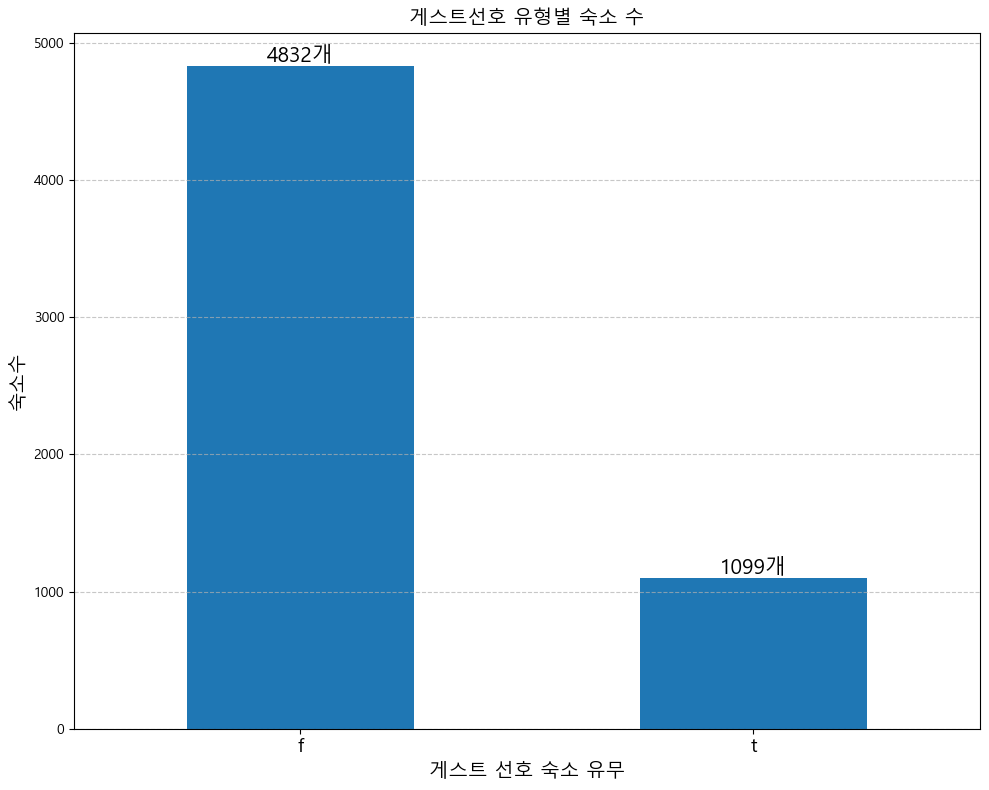

In [ ]:
london_lists_20000['게스트선호'].value_counts().plot(kind='bar', figsize=(10,8))
for i, v in enumerate(london_lists_20000['게스트선호'].value_counts()):
    plt.text(i, v, str(v)+ "개", ha='center', va='bottom', fontsize=15)

plt.title('게스트선호 유형별 숙소 수',fontsize=14)
plt.xlabel('게스트 선호 숙소 유무',fontsize=14)
plt.ylabel('숙소수',fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
london_lists_20000.columns

Index(['숙소_id', '숙소_url', '호스트_id', '슈퍼호스트', '숙소_지역', '숙소_특징', '숙소_유형',
       '수용_인원수', '욕실수', '침실수', '침대수', '편의시설', '숙소_가격', '예약가능여부', '리뷰수',
       '12개월리뷰수', '30일리뷰수', '마지막리뷰', '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
       '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수',
       '게스트선호'],
      dtype='object')

랜덤샘플

- 숙소_정확성_리뷰점수    4.813839
- 숙소_체크인_리뷰점수    4.864104
- 숙소_소통_리뷰점수     4.881526

점수가 높음 <br>

리뷰점수 평균은 4.76

In [ ]:
review_scores = london_lists_20000[['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
       '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']].mean().sort_values()
review_scores

숙소_가격_리뷰점수     4.705665
숙소_청결도_리뷰점수    4.743593
숙소_위치_리뷰점수     4.789174
숙소_정확성_리뷰점수    4.813839
숙소_체크인_리뷰점수    4.864104
숙소_소통_리뷰점수     4.881526
dtype: float64

In [ ]:
london_lists_20000['리뷰점수'].mean()

4.762711178553364

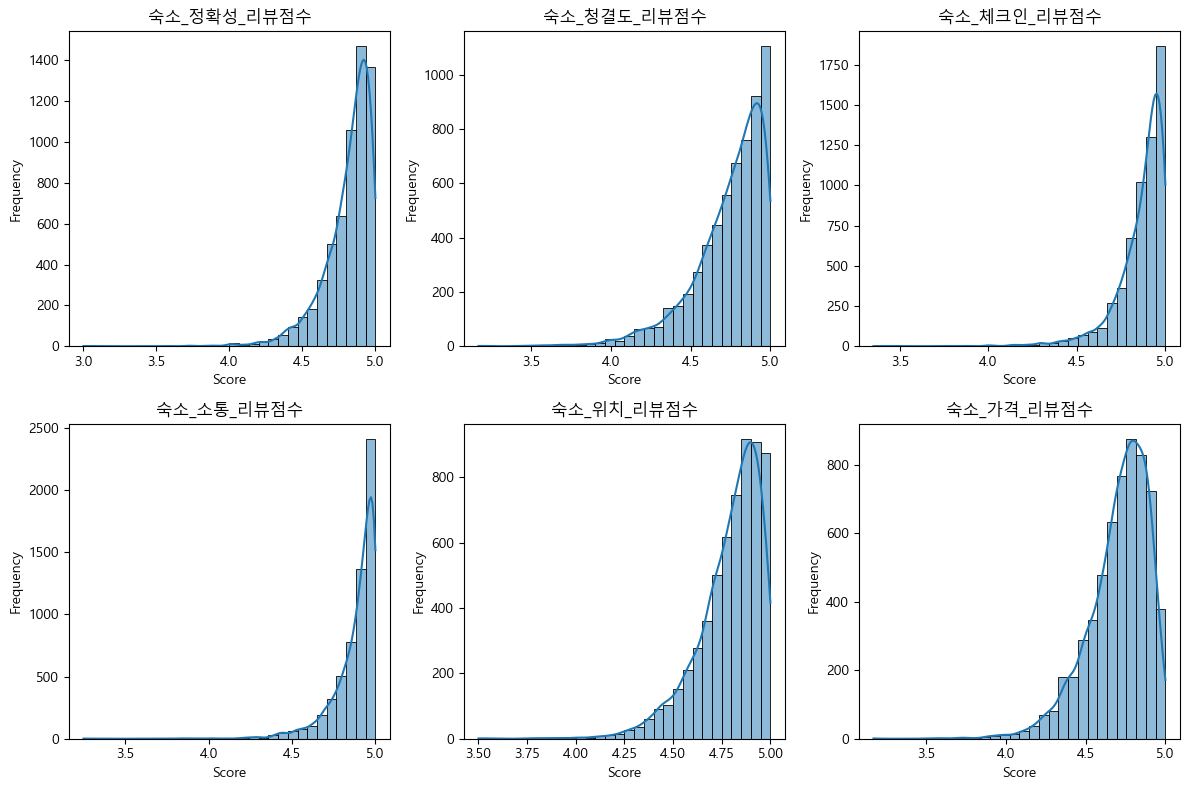

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 예시로 london_lists_20000을 생성합니다. 실제 데이터 프레임을 사용하세요.
# london_lists_20000 = pd.read_csv('path_to_your_file.csv')

# 리뷰 점수 컬럼 선택
review_scores = london_lists_20000[['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
                                    '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수',
                                    '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']]

# 각 리뷰 점수의 분포도 시각화
plt.figure(figsize=(12, 8))
for i, column in enumerate(review_scores.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(review_scores[column], bins=30, kde=True)
    plt.title(column)
    plt.xlabel('Score')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


리뷰점수 분포 확인

In [ ]:
import plotly.express as px
import plotly.graph_objs as go


# '리뷰점수' 데이터 분포를 시각화
fig = px.histogram(london_lists_20000, x='리뷰점수', nbins=50, title='리뷰점수 분포')
fig.update_layout(bargap=0.2,
                  width=800, # 그래프 크기 조정
                  height=500,
                  xaxis_title='리뷰점수',
                  yaxis_title='빈도')
fig.show()

침대침실욕실 분포<br>

- 침대수 2개
- 침실수 1개
- 욕실수 1개

In [ ]:
review_scores = london_lists_20000[['욕실수','침실수','침대수']].mean()

C:\Users\Master\AppData\Local\Temp\ipykernel_14316\2613991652.py:9: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



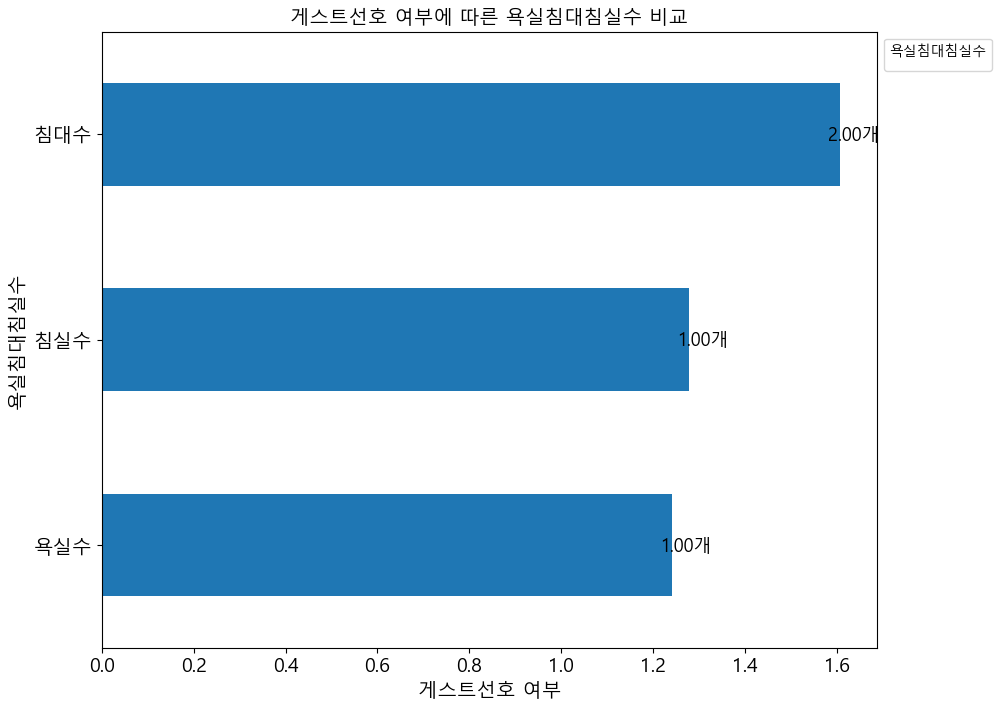

In [ ]:
# 시각화
ax = review_scores.plot(kind='barh', figsize=(10, 8))
plt.title('게스트선호 여부에 따른 욕실침대침실수 비교',fontsize=14)
plt.xlabel('게스트선호 여부',fontsize=14)
plt.ylabel('욕실침대침실수', fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(rotation=0, fontsize=14)

plt.legend(title='욕실침대침실수', bbox_to_anchor=(1., 1), loc='upper left')

# 각 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{round(p.get_width(),0):.2f}개', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='center', xytext=(10, 0), textcoords='offset points', fontsize=13)

plt.show()

수용인원수 분포

In [ ]:
import plotly.express as px
import plotly.graph_objs as go


# '리뷰점수' 데이터 분포를 시각화
fig = px.histogram(london_lists_20000, x='수용_인원수', nbins=50, title='수용인원수 분포')
fig.update_layout(bargap=0.2,
                  width=800, # 그래프 크기 조정
                  height=500,
                  xaxis_title='수용인원수',
                  yaxis_title='빈도')
fig.show()

In [ ]:
random_sample['리뷰날짜'] = random_sample['리뷰날짜'].dt.year

In [ ]:
random_sample.groupby('숙소_id')['리뷰날짜'].value_counts()

숙소_id     리뷰날짜
13913     2011    1
          2013    1
15400     2011    1
17402     2014    2
          2018    1
                 ..
38999399  2022    3
39016057  2020    1
39025542  2022    1
39049983  2024    1
39057470  2022    1
Name: count, Length: 13861, dtype: int64

2019, 2022,2023년의 숙소수가 많이 샘플링 되었다

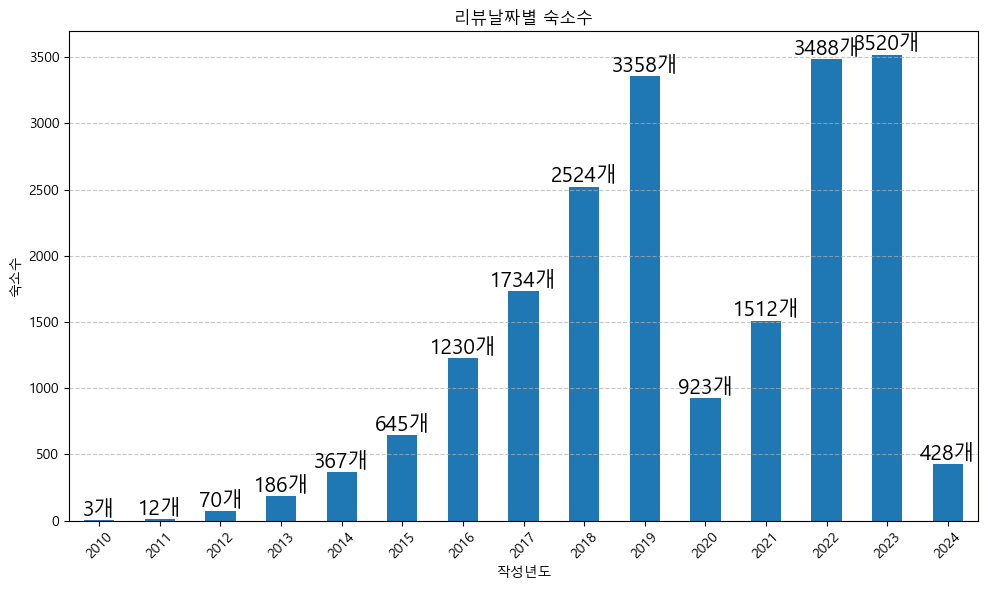

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

comments_by_year = random_sample.groupby('리뷰날짜')['숙소_id'].count()

for i, v in enumerate(comments_by_year):
    plt.text(i, v, str(v)+ "개", ha='center', va='bottom', fontsize=15)

comments_by_year.plot(kind='bar', figsize=(10, 6))
plt.title('리뷰날짜별 숙소수')
plt.xlabel('작성년도')
plt.ylabel('숙소수')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

지역별 분포

In [ ]:
import plotly.express as px
import plotly.graph_objs as go

listing_area = london_lists_20000.groupby('숙소_지역').count()

# '리뷰점수' 데이터 분포를 시각화
fig = px.histogram(listing_area, x='숙소_id', nbins=50, title='수용인원수 분포')
fig.update_layout(bargap=0.2,
                  width=800, # 그래프 크기 조정
                  height=500,
                  xaxis_title='수용인원수',
                  yaxis_title='빈도')
fig.show()

random_sample 분석

In [ ]:
# !pip install nltk
# !pip install wordcloud

In [29]:
# !pip install textblob

import nltk
nltk.download('brown')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('conll2000')
nltk.download('movie_reviews')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

텍스트 전처리


- 소문자로 변경
- 토큰화
- 불용어 제거
- 어간 추출


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import glob
import re  #정규표현식

from functools import reduce #2차원 >> 1차원

from nltk.tokenize import word_tokenize # word >> token
from nltk.corpus import stopwords  #stopwords >> 불용어
from nltk.stem import WordNetLemmatizer # 어간 분석

from collections import Counter

from wordcloud import STOPWORDS, WordCloud

stopWords = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

words = []
def Pretreatment(text):

    for title in random_sample['리뷰']:
        en_words = re.sub(r"[^a-zA-Z]+"," ",str(title)) #정규표현식 사용, 영문 대소문자 ^ 제외한 문자를 공백 (" ")변경
        en_words_token = word_tokenize(en_words.lower()) # 변환 된 단어를 토큰화
        en_words_stop = [word for word in en_words_token if not word in stopWords] # 불용어 제거
        en_words_lemma = [lemma.lemmatize(word) for word in en_words_stop]  #어간 추출
        words.append(en_words_lemma)

# #진행사항 표시
tqdm.pandas()


Pretreatment(random_sample['리뷰'])

In [31]:
word_list = list(reduce(lambda x, y: x + y, words))

In [32]:
word_list

['wanted',
 'somewhere',
 'handy',
 'tottenham',
 'stadium',
 'wembley',
 'place',
 'perfect',
 'block',
 'undergoing',
 'exterior',
 'work',
 'affect',
 'stay',
 'flat',
 'spacious',
 'comfortable',
 'clean',
 'well',
 'equipped',
 'kitchen',
 'comfortable',
 'bedroom',
 'amenity',
 'doorstep',
 'would',
 'certainly',
 'stay',
 'need',
 'area',
 'great',
 'value',
 'money',
 'right',
 'heart',
 'london',
 'quiet',
 'side',
 'street',
 'close',
 'tube',
 'station',
 'within',
 'walking',
 'distance',
 'top',
 'tourist',
 'spot',
 'dated',
 'property',
 'wear',
 'tear',
 'cold',
 'peter',
 'left',
 'blanket',
 'realise',
 'needed',
 'turn',
 'switch',
 'hot',
 'water',
 'therefore',
 'cold',
 'shower',
 'day',
 'one',
 'brilliant',
 'size',
 'flat',
 'area',
 'bed',
 'big',
 'enough',
 'comfortable',
 'wonderful',
 'stay',
 'nathan',
 'loved',
 'eclectic',
 'decor',
 'prime',
 'location',
 'notting',
 'hill',
 'step',
 'tube',
 'communication',
 'great',
 'able',
 'personally',
 'check'

In [ ]:
# file_name = '../../../../data/Airbnb_London/20000_word_list.txt'

# with open(file_name, 'w+') as file :
#     file.write('\n'.join(word_list))

In [33]:
pd.Series(word_list).value_counts().head(20)

great          9778
stay           9533
place          8015
location       6686
host           6325
london         6142
clean          5866
room           5513
apartment      4603
nice           4539
good           4248
would          4177
comfortable    3870
recommend      3784
really         3547
lovely         3542
well           3475
u              3459
everything     3398
flat           3276
Name: count, dtype: int64

불용어 추가 제거

In [34]:
def remove_stopword(word_list, stopwords):
    return [word for word in word_list if word not in stopwords]

word_list = word_list
stopwords = ['great', 'good', 'nice', 'would', 'place', 'stay','apartment','house','room','host','comfortable',
             'amazing','perfect','wonderful','excellent','lovely','highly','recommend','definitely', 'really',
             'london','u', 'everything', 'well', 'home','helpful','also','like','location','staying','could','need']
filtered_word_list = remove_stopword(word_list, stopwords)
filtered_word_list


['wanted',
 'somewhere',
 'handy',
 'tottenham',
 'stadium',
 'wembley',
 'block',
 'undergoing',
 'exterior',
 'work',
 'affect',
 'flat',
 'spacious',
 'clean',
 'equipped',
 'kitchen',
 'bedroom',
 'amenity',
 'doorstep',
 'certainly',
 'area',
 'value',
 'money',
 'right',
 'heart',
 'quiet',
 'side',
 'street',
 'close',
 'tube',
 'station',
 'within',
 'walking',
 'distance',
 'top',
 'tourist',
 'spot',
 'dated',
 'property',
 'wear',
 'tear',
 'cold',
 'peter',
 'left',
 'blanket',
 'realise',
 'needed',
 'turn',
 'switch',
 'hot',
 'water',
 'therefore',
 'cold',
 'shower',
 'day',
 'one',
 'brilliant',
 'size',
 'flat',
 'area',
 'bed',
 'big',
 'enough',
 'nathan',
 'loved',
 'eclectic',
 'decor',
 'prime',
 'notting',
 'hill',
 'step',
 'tube',
 'communication',
 'able',
 'personally',
 'check',
 'walk',
 'plus',
 'left',
 'detailed',
 'instruction',
 'worked',
 'base',
 'time',
 'convenient',
 'folk',
 'looking',
 'commute',
 'central',
 'big',
 'bed',
 'warm',
 'space',
 

In [35]:
pd.Series(filtered_word_list).value_counts().head(20)


clean         5866
flat          3276
station       3024
close         2879
easy          2748
time          2586
walk          2487
area          2361
quiet         2341
friendly      2308
bed           2189
minute        2168
tube          1976
bus           1877
bathroom      1738
located       1726
check         1719
get           1713
restaurant    1640
day           1601
Name: count, dtype: int64

불용어를 더 제거할 필요가 있어보임

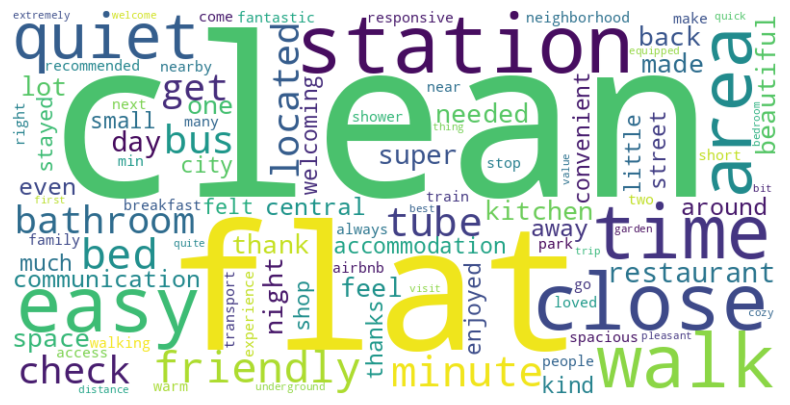

In [36]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_counts = pd.Series(filtered_word_list).value_counts().head(100)

# 워드클라우드를 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
!pip install textblob

In [40]:
from textblob import TextBlob
import re
from collections import Counter

# 예시 텍스트 리스트
texts = random_sample['리뷰']

# 긍정 및 부정 단어 저장을 위한 Counter 초기화
positive_words = Counter()
negative_words = Counter()

# 각 텍스트에 대해 감성 분석 수행 및 결과 출력
for i, text in enumerate(texts):
    # 텍스트 전처리 (소문자 변환, 특수 문자 제거)
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # TextBlob을 사용하여 감성 분석 수행
    blob = TextBlob(text)
    sentiment = blob.sentiment

    # 단어를 분할하여 긍정 및 부정 단어로 분류
    words = text.split()
    for word in words:
        word_blob = TextBlob(word)
        if word_blob.sentiment.polarity > 0:
            positive_words[word] += 1
        elif word_blob.sentiment.polarity < 0:
            negative_words[word] += 1

# 긍정 및 부정 단어 빈도수 출력
print("Positive words frequency:", positive_words)
print("Negative words frequency:", negative_words)


Positive words frequency: Counter({'very': 15963, 'great': 9751, 'clean': 5822, 'nice': 4520, 'good': 4215, 'comfortable': 3851, 'really': 3543, 'lovely': 3536, 'perfect': 2813, 'easy': 2717, 'friendly': 2282, 'highly': 1769, 'super': 1518, 'excellent': 1513, 'beautiful': 1483, 'wonderful': 1473, 'amazing': 1267, 'much': 1172, 'thanks': 1135, 'kind': 1128, 'enjoyed': 1126, 'more': 1118, 'warm': 995, 'fantastic': 900, 'right': 878, 'loved': 849, 'many': 827, 'near': 807, 'best': 796, 'welcome': 787, 'quick': 722, 'first': 711, 'pleasant': 698, 'safe': 651, 'exactly': 607, 'available': 578, 'absolutely': 569, 'most': 564, 'sure': 546, 'better': 537, 'tidy': 492, 'quickly': 479, 'far': 460, 'able': 455, 'ideal': 432, 'large': 427, 'easily': 412, 'happy': 412, 'modern': 409, 'love': 407, 'perfectly': 389, 'peaceful': 355, 'pretty': 349, 'light': 343, 'early': 336, 'hot': 334, 'own': 333, 'clear': 324, 'stylish': 324, 'appreciated': 321, 'attentive': 319, 'bright': 317, 'cute': 313, 'high':

In [41]:
positive_words.values()

Counter({'handy': 151,
         'perfect': 2813,
         'comfortable': 3851,
         'clean': 5822,
         'certainly': 174,
         'great': 9751,
         'right': 878,
         'top': 301,
         'hot': 334,
         'brilliant': 212,
         'wonderful': 1473,
         'loved': 849,
         'able': 455,
         'detailed': 95,
         'lovely': 3536,
         'very': 15963,
         'warm': 995,
         'good': 4215,
         'more': 1118,
         'clear': 324,
         'nice': 4520,
         'conscious': 3,
         'fabulous': 213,
         'easy': 2717,
         'beautifully': 196,
         'fantastic': 900,
         'gorgeous': 157,
         'really': 3543,
         'super': 1518,
         'kind': 1128,
         'pleasant': 698,
         'beautiful': 1483,
         'amazing': 1267,
         'own': 333,
         'friendly': 2282,
         'easily': 412,
         'enjoyed': 1126,
         'far': 460,
         'new': 290,
         'modern': 409,
         'most': 564,

In [42]:
# 긍정 단어의 총 수 계산
total_positive_words = sum(positive_words.values())

In [43]:
total_positive_words

112637

In [44]:
# 부정 단어의 총 수 계산
total_negative_words = sum(negative_words.values())

In [45]:
total_negative_words

16564

TF-IDF 실행

In [ ]:
# !pip install scikit-learn

In [46]:
import re

random_sample['리뷰'] = random_sample['리뷰'].apply(lambda x: re.sub(r'[^a-zA-Z\s]+', '', x))
random_sample.head()

,숙소_id,리뷰날짜,리뷰
484604,29585223,2022-05-30,We wanted somewhere handy for the Tottenham s...
266232,14378646,2022-11-20,great value for money right in the heart of Lo...
555,165336,2022-08-25,Had a wonderful stay at Nathans Loved the ecle...
288138,15340823,2022-04-24,Very convenient location for folks who are loo...
560312,37483245,2019-12-12,Great location great space and good price


분석 모델 구축

In [47]:
reviews = random_sample['리뷰']

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# tf-idf 벡터화
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(reviews)

NameError: name 'reviews' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(tfidf_t, reviews)

변역 코드 <br>

- google trans api
- papago api
- opnen api

In [ ]:
# from textblob import TextBlob

# def translate_to_english(text):
#     # TextBlob 객체 생성
#     blob = TextBlob(text)

#     # 언어 감지
#     detected_language = blob.detect_language()

#     # 감지된 언어가 영어인 경우 원본 텍스트 반환
#     if detected_language == 'en':
#         return text

#     # 번역
#     translated_blob = blob.translate(to='en')

#     return translated_blob.raw

# # 테스트를 위한 예시 텍스트
# example_text = "안녕하세요, 반갑습니다."

# # 언어 감지 및 번역
# translated_text = translate_to_english(example_text)

# print("원본 텍스트:", example_text)
# print("번역된 텍스트:", translated_text)


In [ ]:
# !pip install openai pandas tqdm
# !pip install openai==0.28

openai 코드

In [ ]:
# import openai
# import pandas as pd
# from tqdm import tqdm

# openai.api_key = 'api key 입력'

In [ ]:
# def translate_text(text):
#     response = openai.ChatCompletion.create(
#          model = 'gpt-3.5-turbo',
#          messages = [
#              {'role' : 'user', 'content' : f"이 리뷰를 영어로 번역해줘 : \n\n{text}"},

#             ],
#         max_tokens=100,
#         n=1,
#         stop=None,
#         temperature=0.5
#     )
#     translated_text = response.choices[0].message['content']
#     return translated_text

# #진행사항 표시
# tqdm.pandas()

# matching_rows['리뷰_영어'] = matching_rows['리뷰'].progress_apply(translate_text)




In [ ]:
# !pip install googletrans==4.0.0-rc1
# !pip install langdetect googletrans==4.0.0-rc1

구글 번역 api 제한 1일 16000자 까지 가능

In [ ]:
# from langdetect import detect
# from googletrans import Translator


# def translate_to_english(text):
#     # Google Translate 객체 생성
#     translator = Translator()

#     # 번역된 텍스트를 저장할 리스트
#     translated_texts = []

#     for t in text:
#         # 텍스트의 언어 감지
#         detected_language = detect(t)

#         # 감지된 언어가 영어인 경우 원본 텍스트를 저장
#         if detected_language == 'en':
#             translated_texts.append(t)
#         else:
#             # 번역
#             translation = translator.translate(t, src=detected_language, dest='en')
#             translated_texts.append(translation.text)

#     return translated_texts

# # 텍스트를 영어로 번역하여 '리뷰_영어' 열에 저장
# english_reviews = translate_to_english(matching_rows['리뷰'][:10])

파파고 api 제한 1일 최대 5000자

In [ ]:
# import requests

# def detect_language(text, client_id, client_secret):
#     # 파파고 API 호출을 위한 URL 및 요청 데이터 설정
#     url = ''
#     headers = {
#         'X-Naver-Client-Id': client_id,
#         'X-Naver-Client-Secret': client_secret
#     }
#     data = {'query': text}

#     # 파파고 API 호출
#     response = requests.post(url, headers=headers, data=data)

#     # 응답 확인 및 언어 감지 결과 반환
#     if response.status_code == 200:
#         detected_language = response.json()['langCode']
#         return detected_language
#     else:
#         print(f"언어 감지 중 오류 발생: {response.status_code}")
#         return None

# def translate_to_english(text, client_id, client_secret):
#     # 언어 감지
#     detected_language = detect_language(text, client_id, client_secret)

#     # 감지된 언어가 이미 영어인 경우 원본 텍스트 반환
#     if detected_language == 'en':
#         return text

#     # 파파고 API 호출을 위한 URL 및 요청 데이터 설정
#     url = ''
#     headers = {
#         'X-Naver-Client-Id': client_id,
#         'X-Naver-Client-Secret': client_secret
#     }
#     data = {
#         'source': detected_language,
#         'target': 'en',
#         'text': text
#     }

#     # 파파고 API 호출
#     response = requests.post(url, headers=headers, data=data)

#     # 응답 확인 및 번역 결과 반환
#     if response.status_code == 200:
#         translated_text = response.json()['message']['result']['translatedText']
#         return translated_text
#     else:
#         print(f"번역 중 오류 발생: {response.status_code}")
#         return None

# # 네이버 개발자 센터에서 발급받은 클라이언트 ID와 클라이언트 시크릿
# client_id = 'your_client_id'
# client_secret = 'your_client_secret'

# # 테스트를 위한 예시 텍스트
# example_text = "안녕하세요, 반갑습니다."

# # 언어 감지 및 번역
# translated_text = translate_to_english(example_text, client_id, client_secret)

# print("원본 텍스트:", example_text)
# print("번역된 텍스트:", translated_text)
